In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# this tells seaborn and matplotlib to generate plots inline in the notebook
%matplotlib inline  

# these two lines allow you to control the figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

inputSet = input('Please enter a set of numbers: ')
print inputSet

Populating the interactive namespace from numpy and matplotlib
Please enter a set of numbers: [16]
[16]


In [16]:
values = list(xrange(101))

import collections

concepts = collections.OrderedDict([
    ('even' , [x for x in values if x % 2 == 0]),
    ('odd' , [x for x in values if x % 2 == 1]),
    ('squares' , [x ** 2 for x in range(1,11)]),
    ('mult of 3' , [x for x in values if x % 3 == 0]),
    ('mult of 4' , [x for x in values if x % 4 == 0]),
    ('mult of 5' , [x for x in values if x % 5 == 0]),
    ('mult of 6' , [x for x in values if x % 6 == 0]),
    ('mult of 7' , [x for x in values if x % 7 == 0]), 
    ('mult of 8' , [x for x in values if x % 8 == 0]), 
    ('mult of 9' , [x for x in values if x % 9 == 0]),
    ('mult of 10' , [x for x in values if x % 10 == 0]),
    ('ends in 0' , [x for x in values if x % 10 == 0]),
    ('ends in 1' , [x for x in values if x % 10 == 1]),
    ('ends in 2' , [x for x in values if x % 10 == 2]),
    ('ends in 3' , [x for x in values if x % 10 == 3]),
    ('ends in 4' , [x for x in values if x % 10 == 4]),
    ('ends in 5' , [x for x in values if x % 10 == 5]),
    ('ends in 6' , [x for x in values if x % 10 == 6]),
    ('ends in 7' , [x for x in values if x % 10 == 7]),
    ('ends in 8' , [x for x in values if x % 10 == 8]),
    ('ends in 9' , [x for x in values if x % 10 == 9]),
    ('powers of 2' , [2**x for x in values if 2**x <= 100]),
    ('powers of 3' , [3**x for x in values if 3**x <= 100]),
    ('powers of 4' , [4**x for x in values if 4**x <= 100]),
    ('powers of 5' , [5**x for x in values if 5**x <= 100]),
    ('powers of 6' , [6**x for x in values if 6**x <= 100]),
    ('powers of 7' , [7**x for x in values if 7**x <= 100]),
    ('powers of 8' , [8**x for x in values if 8**x <= 100]),
    ('powers of 9' , [9**x for x in values if 9**x <= 100]),
    ('powers of 10' , [10**x for x in values if 10**x <= 100]),
    ('all' , values),
    ('powers of 2 + {37}' , [2**x for x in values if 2**x <= 100] + [37]),
    ('powers of 2 - {32}' , [2**x for x in values if 2**x <= 100 and x != 5])
])

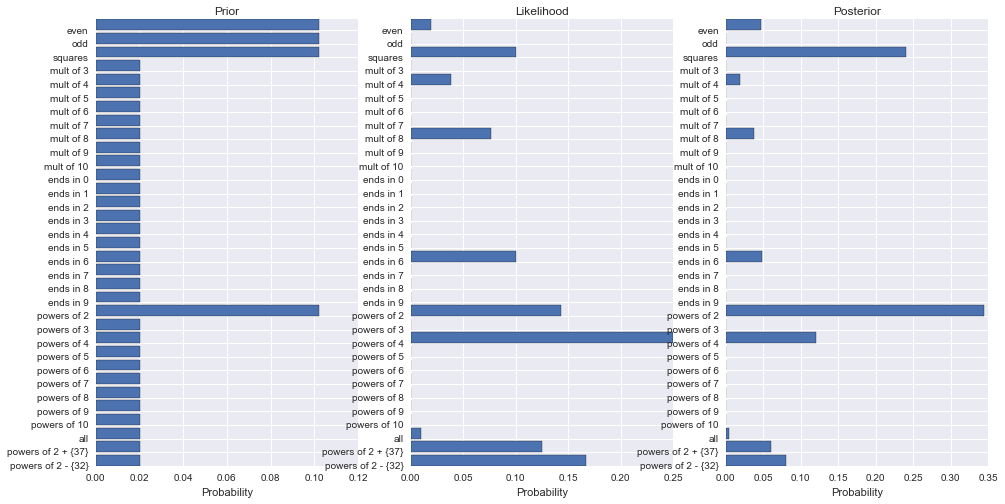

The most probable is 'powers of 2' with a probability of [ 0.34352597]


In [17]:
#PRIOR
y_pos = np.arange(len(concepts))
prior = numpy.ones(( len(concepts), 1 ))
prior[0] = 5
prior[1] = 5
prior[2] = 5
prior[21] = 5
prior = prior / numpy.sum(prior)

ax1 = plt.subplot(131)
y_keys = concepts.keys()
y_keys.reverse()
prior = prior[::-1] #Reverse prior so it graphs properly
plt.barh(y_pos, prior)
plt.yticks(y_pos, y_keys)
plt.title('Prior')
plt.xlabel('Probability')



#LIKELIHOOD

ax2 = plt.subplot(132, sharey=ax1)
likelihood = numpy.zeros(( len(concepts), 1))

#Math for Likelihood
counter = 0
for key, value in concepts.items(): #All Concepts
    if set(inputSet) <= set(value):   
        if likelihood[counter] == 0:
            likelihood[counter] = 1
        likelihood[counter] = pow(1.0/len(value), len(inputSet))
        
    counter+=1

likelihood = likelihood[::-1] #Reverse likelihood so it graphs properly

plt.title('Likelihood')
plt.xlabel('Probability')
plt.barh(y_pos, likelihood)


#POSTERIOR

def getNormalizer():
    total = 0
    for x in xrange(len(concepts)):
        total+= prior[x]*likelihood[x]
    return total

ax3 = plt.subplot(133, sharey=ax1)
posterior = numpy.zeros(( len(concepts), 1))

for x in xrange(len(concepts)):
    posterior[x] = likelihood[x] * prior[x] / getNormalizer()

#Don't reverse the posterior because we're using a reversed
#Version of the likelihood and prior to calculate it
plt.title('Posterior')
plt.xlabel('Probability')
plt.barh(y_pos, posterior)


plt.show()

print "The most probable is '" + str(concepts.keys()[len(concepts) - argmax(posterior) - 1]) + "' with a probability of " + str(max(posterior))

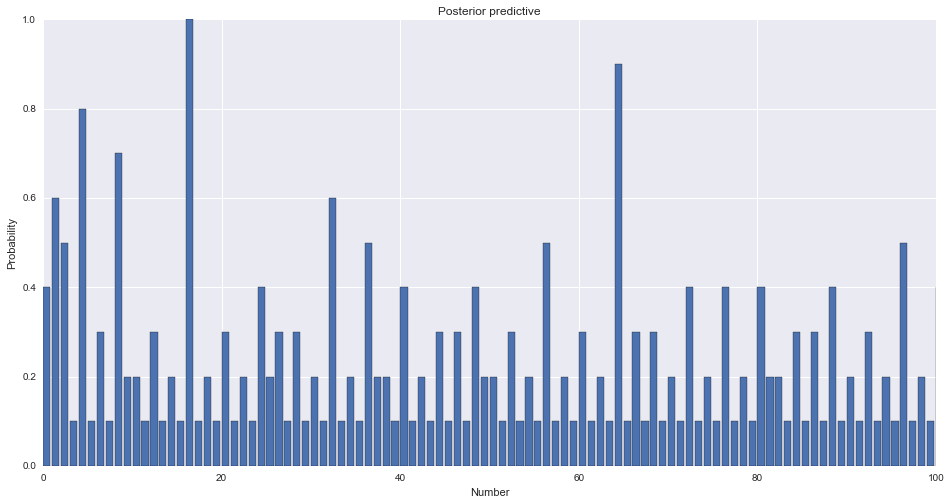

In [14]:
histDict = dict.fromkeys(list(xrange(0,101)), 0)
pList = []

counter = 0
for x in posterior:
    if x != 0:
        pList.append(counter)
    counter+=1

pListLen = len(pList)
    
for x in histDict:
    counter = 0
    for y in pList:
        if x in concepts.values()[len(concepts) - 1 - y]:
            counter+=1
    histDict[x] = float(counter) / pListLen            

plt.bar(histDict.keys(), histDict.values())
plt.xlim(0,100)
plt.ylim(0,1.0)
plt.title('Posterior predictive')
plt.ylabel('Probability')
plt.xlabel('Number')
plt.show()